##Decision Tree:

- It is a tree like structure to separate the data features by decisions.
- Used for complex data where other regression and classification models can't be used.
- Used for both regression and classification tasks.

Key Terms:

- Root Node: The top-most decision node in a decision tree.
- Decision Node: A tree node or parent node that splits into one ore more child nodes is called a decision node.
- Leaf or Terminal Node: Bottom nodes that (generally speaking) don’t split any further.
- Splitting: Process of dividing a node into two or more child nodes.
- Pruning: The opposite process of splitting. Removing the child nodes of a decision node is called pruning.


Regression Trees:
- Used where target value is continuous and we need to predict it's value,
- In this tree, each node contains numeric value.

Classification Trees:
- where the target variable is categorical, the tree is used to identify the "class" within which a target variable would likely fall into.
- In this, each node contains discrete categories.

####Implementation of Decision Tree

####Decision Tree for Classification

Video: [CodeBasics](https://youtu.be/PHxYNGo8NcI)

In [1]:
import pandas as pd

#Decision Tree for Classification

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics



In [2]:
#load the diabetes dataset
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#feature selection
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                'BMI','DiabetesPedigreeFunction','Age']
X = pima[feature_cols]
y = pima['Outcome']

In [4]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                    random_state = 1)


In [5]:
#create the model

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(y_pred)



[0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [12]:
print(y_test)

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64


In [6]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.70995670995671


In [7]:
#visualizing the tree

!pip install graphviz
!pip install pydotplus

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

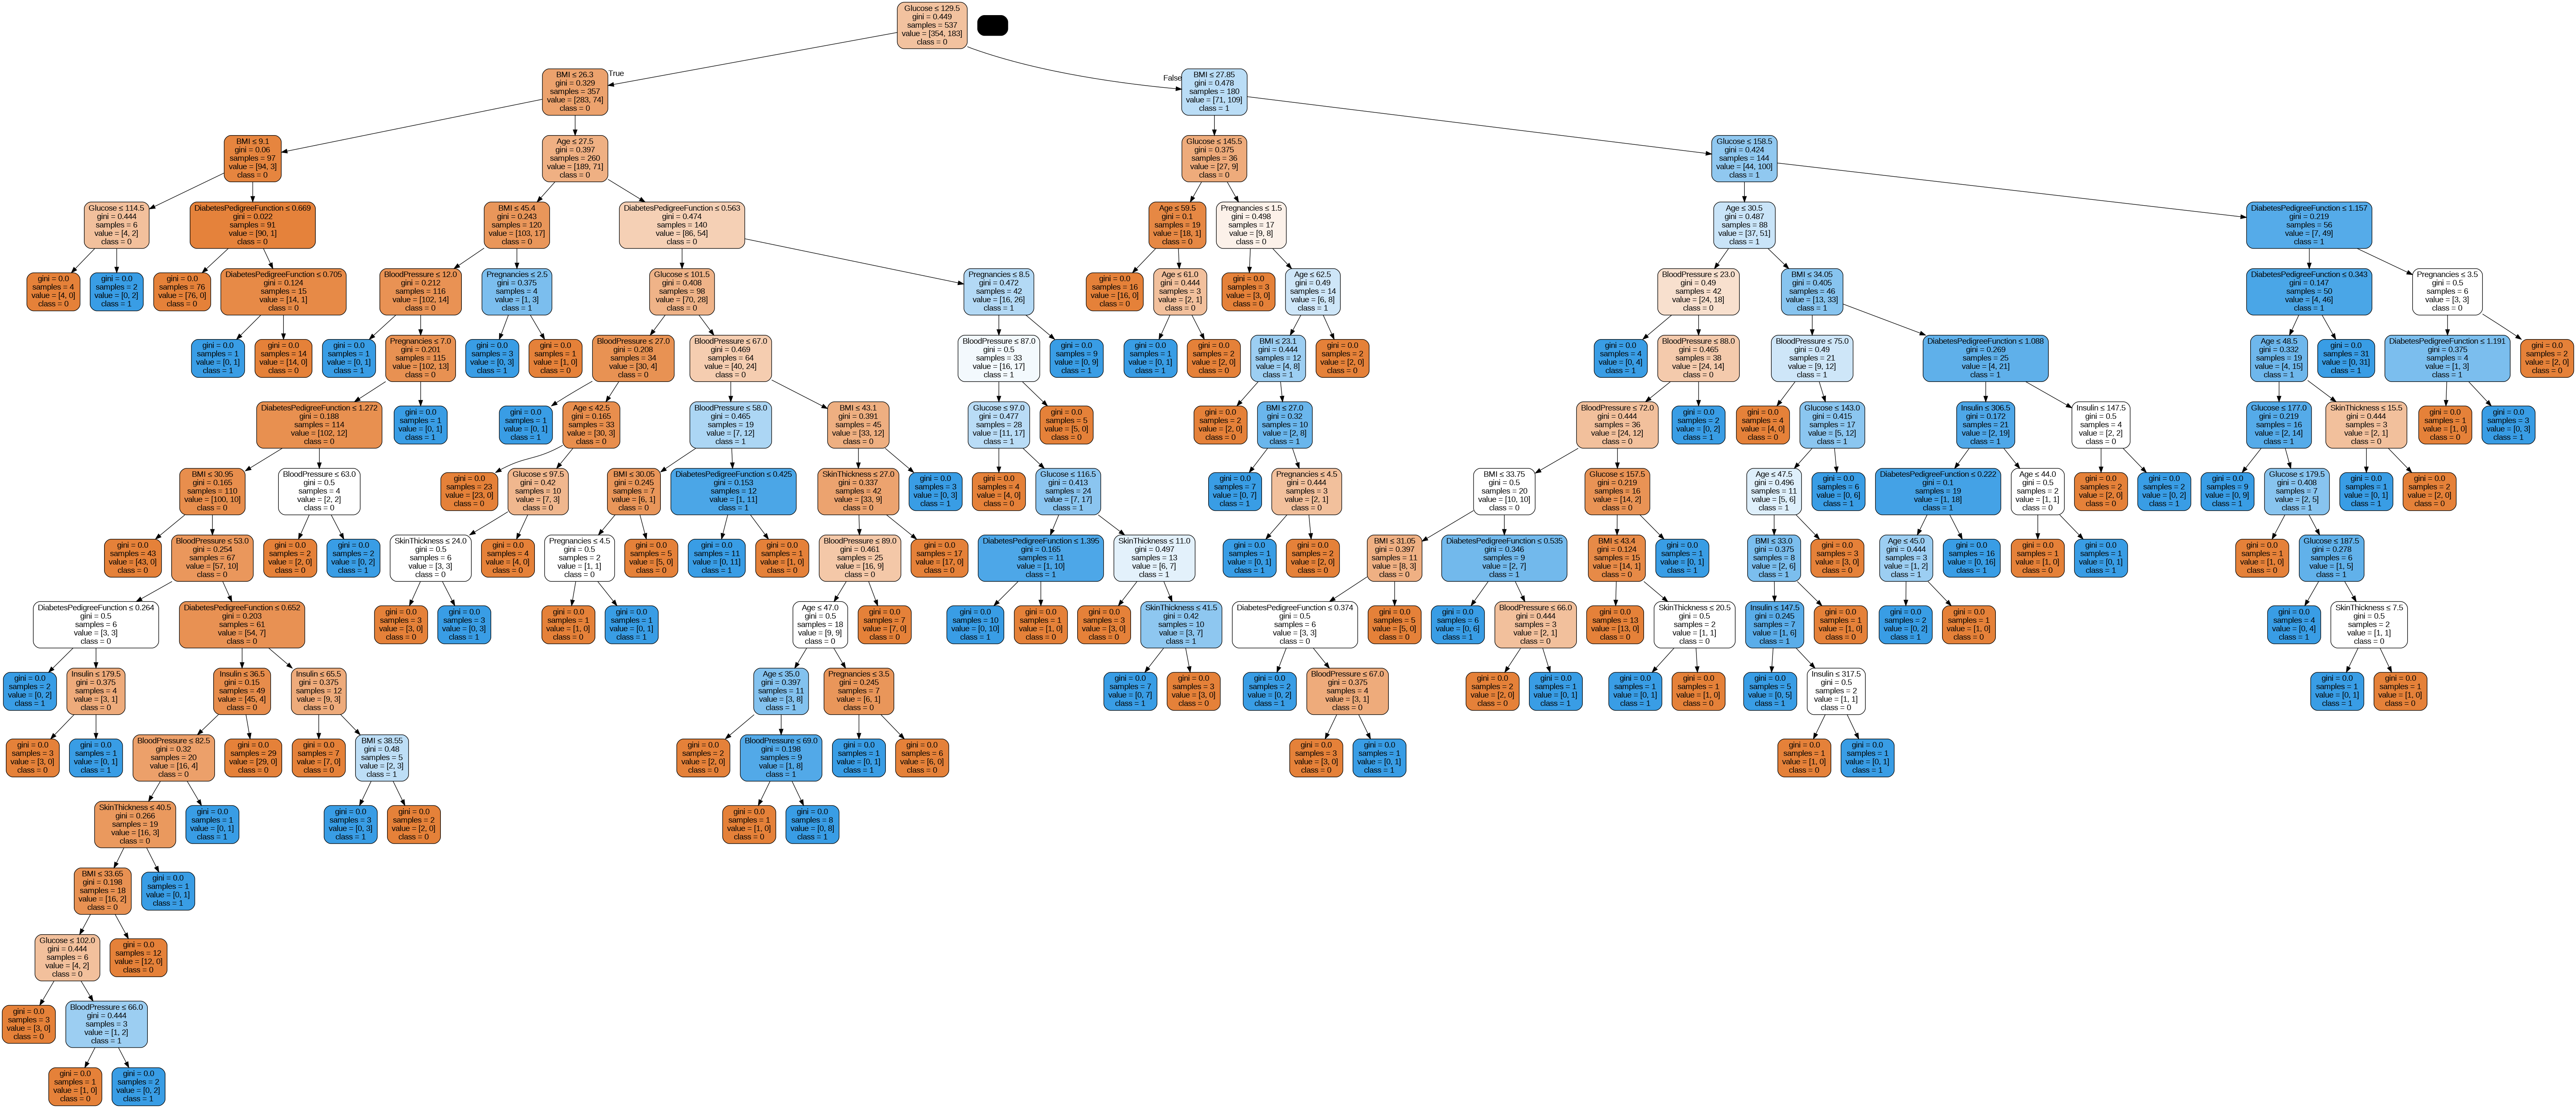

In [9]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')

Image(graph.create_png())

- Imported the required libraries.
- Created a StringIO object called dot_data to hold the text representation of the decision tree.
- Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
- Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.
- Written the generated graph to a PNG file named "diabetes.png".
- Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module

In [22]:
#optimizing the tree
clf = DecisionTreeClassifier(criterion ='entropy', max_depth = 3,
                             splitter ='best')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706


In [ ]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                'BMI','DiabetesPedigreeFunction','Age']

- Criterion: 'gini': impurity of node, 'entropy': information gain
- splitter: 'best', 'random'
- max_depth : depth of nodes

In [11]:
clf.predict([[1,150,70,30,0,35,0.5,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Decision Tree for Regression